# Agricultural-Production-Optimization-Engine


As we all know that agriculture depends largely on the nature of soil and the climatic conditions and many a times, we face unpredictable changes in climate like, non-seasonal rainfall or heat waves or fluctuations in humidity levels, etc. and all such events cause a great loss to our farmers and farming, because of which they are not able to utilize their agricultural land to it's fullest.So to solve all such problems, I have build a Machine Learning Model by the virtue of which we can help farmers, optimize the agricultural production, because this predictive model will help them understand that for a particular soil & given climatic condition, which crop will be best suitable for the harvest.

There are 7 key factors that I've taken into account which will help us in determining, exactly which crop should be grown and at what period of time, viz. Amount of Nitrogen, Phosphorus and Potassium in soil, Temperature in degree celcius, Humidity, pH and Rainfall in mm.

Tools used: Python & Jupyter Notebook Libraries used: Numpy, Pandas, Seaborn, Matplotlib, ipywidgets and sklearn. Machine Learning Algorithms used: Clustering Analysis and Logistic Regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [2]:
df = pd.read_csv('data.csv')
df.head(2)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice


In [3]:
print('Shape of Dataset :' , df.shape)

Shape of Dataset : (2200, 8)


In [4]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df.info

<bound method DataFrame.info of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [6]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [7]:
#lets' check the summary for all the crops.
print('Average Ratio of Nitrogen in the Soil : {0:.2f}'.format(df['N'].mean()))
print('Average Ratio of Phosphorous in the Soil : {0:.2f}'.format(df['P'].mean()))
print('Average Ratio of Potassium in the Soil : {0:.2f}'.format(df['K'].mean()))
print('Average Temperature in Celsius in the Soil : {0:.2f}'.format(df['temperature'].mean()))
print('Average Relative Humidity in % : {0:.2f}'.format(df['humidity'].mean()))
print('Average PH value of the Soil : {0:.2f}'.format(df['ph'].mean()))
print('Average Rainfall in mm of the Soil : {0:.2f}'.format(df['rainfall'].mean()))

Average Ratio of Nitrogen in the Soil : 50.55
Average Ratio of Phosphorous in the Soil : 53.36
Average Ratio of Potassium in the Soil : 48.15
Average Temperature in Celsius in the Soil : 25.62
Average Relative Humidity in % : 71.48
Average PH value of the Soil : 6.47
Average Rainfall in mm of the Soil : 103.46


In [8]:
#lets check the summary statistics for each of the crops

@interact
def summary(crops = list(df['label'].value_counts().index)):
    x =  df[df['label'] == crops]
    print('---------------------------------------------------------')
    print('Statistics for Nitrogen')
    print('Minium Nitrogen required :' , x['N'].min())
    print('Average Nitrogen required :' , x['N'].mean())
    print('Maximum Nitrogen required :' , x['N'].max())
    print('---------------------------------------------------------')
    print('Statistics for Phosphorous')
    print('Minium Phosphorous required :' , x['P'].min())
    print('Average Phosphorous required :' , x['P'].mean())
    print('Maximum Phosphorous required :' , x['P'].max())
    print('---------------------------------------------------------')
    print('Statistics for Potassium')
    print('Minium Potassium required :' , x['K'].min())
    print('Average Potassium required :' , x['K'].mean())
    print('Maximum Potassium required :' , x['K'].max())
    print('---------------------------------------------------------')
    print('Statistics for Temperature')
    print('Minium Temperature required in celsius: {0:.2f}' , x['temperature'].min())
    print('Average Temperature required in celsius : {0:.2f}' , x['temperature'].mean())
    print('Maximum Temperature required in celsius : {0:.2f}',x['temperature'].max())
    print('---------------------------------------------------------')
    print('Statistics for Relative Humidity')
    print('Minium Relative Humidity required : {0:.2f}' , x['humidity'].min())
    print('Average Relative Humidity required : {0:.2f}' , x['humidity'].mean())
    print('Maximum Relative Humidity required : {0:.2f}', x['humidity'].max())
    print('---------------------------------------------------------')
    print('Statistics for PH in mm')
    print('Minium PH required in mm : {0:.2f}' , x['ph'].min())
    print('Average PH required in mm: {0:.2f}',x['ph'].mean())
    print('Maximum PH required in mm: {0:.2f}',x['ph'].max())
    print('---------------------------------------------------------')
    print('Statistics for Rainfall')
    print('Minium Rainfall required : {0:.2f}',x['rainfall'].min())
    print('Average Rainfall required : {0:.2f}',x['rainfall'].mean())
    print('Maximum Rainfall required : {0:.2f}',x['rainfall'].max())

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [9]:
#lets compare the average requirement for each crops with average conditions.
@interact
def compare(conditions = ['N' , 'P' , 'K' ,'temperature' , 'ph' , 'humidity' , 'rainfall']):
    print('Average value for' , conditions , 'is {0:.2f}'.format(df[conditions].mean()))
    print('-----------------------------------------------------------------------------')
    print('Rice :{0:.2f}'.format(df[(df['label'] == 'rice')][conditions].mean()))
    print('Black Grams :{0:.2f}'.format(df[(df['label'] == 'blackgram')][conditions].mean()))
    print('Maize :{0:.2f}'.format(df[(df['label'] == 'maize')][conditions].mean()))
    print('Jute :{0:.2f}'.format(df[(df['label'] == 'jute')][conditions].mean()))
    print('Coconut :{0:.2f}'.format(df[(df['label'] == 'coconut')][conditions].mean()))
    print('Apple :{0:.2f}'.format(df[(df['label'] == 'apple')][conditions].mean()))
    print('Papaya :{0:.2f}'.format(df[(df['label'] == 'papaya')][conditions].mean()))
    print('Muskmelon :{0:.2f}'.format(df[(df['label'] == 'muskmelon')][conditions].mean()))
    print('Water melon :{0:.2f}'.format(df[(df['label'] == 'watermelon')][conditions].mean()))
    print('Kidney Beans :{0:.2f}'.format(df[(df['label'] == 'kidneybeans')][conditions].mean()))
    print('Mung Beans :{0:.2f}'.format(df[(df['label'] == 'mungbean')][conditions].mean()))
    print('Oranges :{0:.2f}'.format(df[(df['label'] == 'orange')][conditions].mean()))
    print('Chick Peas :{0:.2f}'.format(df[(df['label'] == 'chickpea')][conditions].mean()))
    print('Lentils :{0:.2f}'.format(df[(df['label'] == 'lentil')][conditions].mean()))
    print('Moth Beans :{0:.2f}'.format(df[(df['label'] == 'mothbeans')][conditions].mean()))
    print('Pigeon Peas :{0:.2f}'.format(df[(df['label'] == 'pigeonpeas')][conditions].mean()))
    print('Mango :{0:.2f}'.format(df[(df['label'] == 'mango')][conditions].mean()))
    print('Pomegranate :{0:.2f}'.format(df[(df['label'] == 'pomegranate')][conditions].mean()))
    print('coffee :{0:.2f}'.format(df[(df['label'] == 'coffee')][conditions].mean()))
    print('Cotton :{0:.2f}'.format(df[(df['label'] == 'cotton')][conditions].mean()))
    print('Grapes :{0:.2f}'.format(df[(df['label'] == 'grapes')][conditions].mean()))
    print('Banana :{0:.2f}'.format(df[(df['label'] == 'banana')][conditions].mean()))
    

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [10]:
#Lets make this functions more intuitive
@interact
def compare(conditions = ['N' , 'P' , 'K' ,'temperature' , 'ph' , 'humidity' , 'rainfall']):
    print('Crops which require greater than average' , conditions , '\n')
    print(df[df[conditions]>df[conditions].mean()]['label'].unique())
    print('-----------------------------------------------------------------')
    print('Crops which require less than average' , conditions , '\n')
    print(df[df[conditions] <= df[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

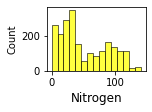

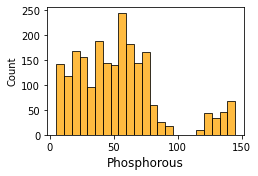

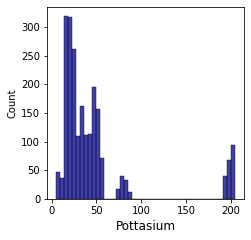

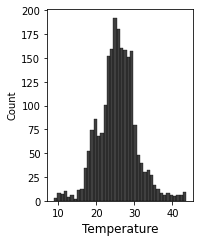

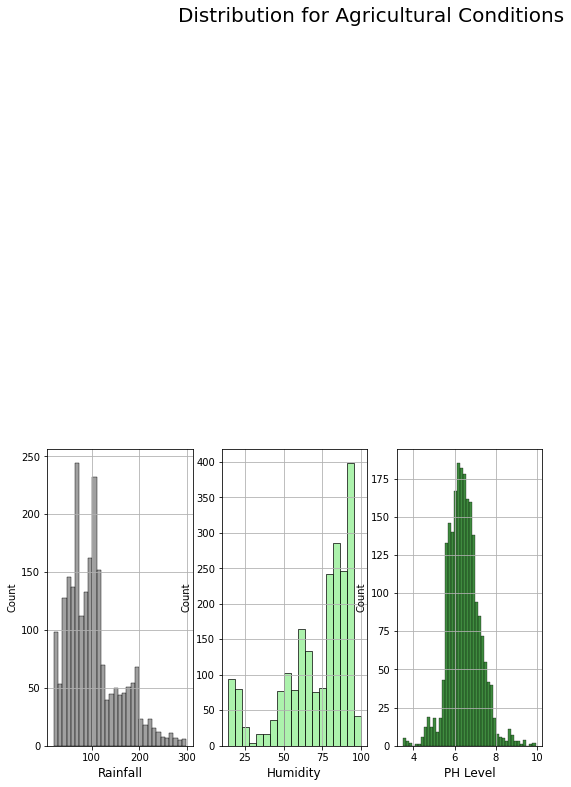

In [15]:
#Checking distributiion for each crop

plt.subplot(3,3,1)
sns.histplot(df['N'], color="yellow")
plt.xlabel('Nitrogen', fontsize = 12)
plt.figure(figsize=(12,8))
plt.grid()

plt.subplot(3,3,2)
sns.histplot(df['P'], color="orange")
plt.xlabel('Phosphorous', fontsize = 12)
plt.figure(figsize=(12,12))
plt.grid()

plt.subplot(3,3,3)
sns.histplot(df['K'], color="darkblue")
plt.xlabel('Pottasium', fontsize = 12)
plt.figure(figsize=(12,12))
plt.grid()

plt.subplot(3,4,4)
sns.histplot(df['temperature'], color="black")
plt.xlabel('Temperature', fontsize = 12)
plt.figure(figsize=(12,12))
plt.grid()

plt.subplot(2,4,5)
sns.histplot(df['rainfall'], color="grey")
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(2,4,6)
sns.histplot(df['humidity'], color="lightgreen")
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2,4,7)
sns.histplot(df['ph'], color="darkgreen")
plt.xlabel('PH Level', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()

In [16]:
#Checking that crops those have unusual requirements

print("Some Interesting Patterns")
print("...........................................")
print("Crops that require very High Ratio of Nitrogen Content in Soil:", df[df['N'] > 120]['label'].unique())
print("Crops that require very High Ratio of Phosphorous Content in Soil:", df[df['P'] > 100]['label'].unique())
print("Crops that require very High Ratio of Potassium Content in Soil:", df[df['K'] > 200]['label'].unique())
print("Crops that require very High Rainfall:", df[df['rainfall'] > 200]['label'].unique())
print("Crops that require very Low Temperature:", df[df['temperature'] < 10]['label'].unique())
print("Crops that require very High Temperature:", df[df['temperature'] > 40]['label'].unique())
print("Crops that require very Low Humidity:", df[df['humidity'] < 20]['label'].unique())
print("Crops that require very Low pH:", df[df['ph'] < 4]['label'].unique())
print("Crops that require very High pH:", df[df['ph'] > 9]['label'].unique())

Some Interesting Patterns
...........................................
Crops that require very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops that require very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops that require very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops that require very High Rainfall: ['rice' 'papaya' 'coconut']
Crops that require very Low Temperature: ['grapes']
Crops that require very High Temperature: ['grapes' 'papaya']
Crops that require very Low Humidity: ['chickpea' 'kidneybeans']
Crops that require very Low pH: ['mothbeans']
Crops that require very High pH: ['mothbeans']


In [17]:
#Checking which crop to be grown according to the season

print("Summer Crops")
print(df[(df['temperature'] > 30) & (df['humidity'] > 50)]['label'].unique())
print("...........................................")
print("Winter Crops")
print(df[(df['temperature'] < 20) & (df['humidity'] > 30)]['label'].unique())
print("...........................................")
print("Monsoon Crops")
print(df[(df['rainfall'] > 200) & (df['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
...........................................
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
...........................................
Monsoon Crops
['rice' 'papaya' 'coconut']


In [18]:
from sklearn.cluster import KMeans

#removing the labels column
x = df.drop(['label'], axis=1)

#selecting all the values of data
x = x.values

#checking the shape
print(x.shape)

(2200, 7)


<function matplotlib.pyplot.show(close=None, block=None)>

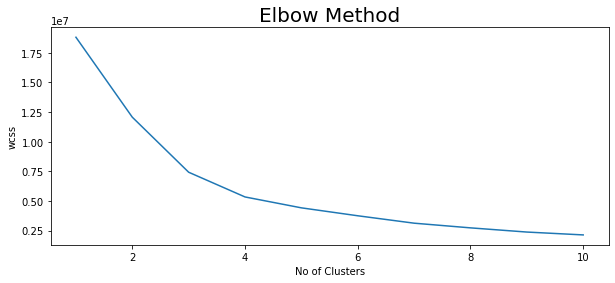

In [34]:
#Determining the optimum number of clusters within the Dataset

plt.rcParams['figure.figsize'] = (10,4)

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 2000, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
#Plotting the results

plt.plot(range(1,11), wcss)
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show

In [35]:
#Implementation of K Means algorithm to perform Clustering analysis

km = KMeans(n_clusters = 4, init = 'k-means++',  max_iter = 2000, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

#Finding the results
a = df['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

#Checking the clusters for each crop
print("Lets Check the results after applying K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("...........................................")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("...........................................")
print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("...........................................")
print("Crops in Fourth Cluster:", z[z['cluster'] == 3]['label'].unique())

Lets Check the results after applying K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
...........................................
Crops in Second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
...........................................
Crops in Third Cluster: ['grapes' 'apple']
...........................................
Crops in Fourth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [36]:
#Splitting the Dataset for predictive modelling

y =df['label']
x = df.drop(['label'], axis=1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [37]:
#Creating training and testing sets for results validation
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("The Shape Of x train:", x_train.shape)
print("The Shape Of x test:", x_test.shape)
print("The Shape Of y train:", y_train.shape)
print("The Shape Of y test:", y_test.shape)

The Shape Of x train: (1760, 7)
The Shape Of x test: (440, 7)
The Shape Of y train: (1760,)
The Shape Of y test: (440,)


In [38]:
#Creating a Predictive Model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


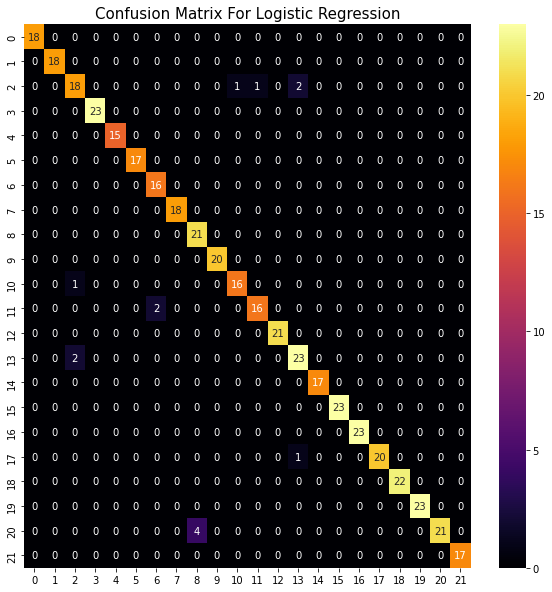

In [39]:
#Evaluating the model performance
from sklearn.metrics import confusion_matrix

#Printing the Confusing Matrix
plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.title('Confusion Matrix For Logistic Regression', fontsize = 15)
plt.show()

In [40]:
#Defining the classification Report
from sklearn.metrics import classification_report

#Printing the Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [41]:
#head of dataset
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [44]:
prediction = model.predict((np.array([[90, 40, 40, 20, 80, 7, 200]])))
print("The Suggested Crop for given climatic condition is :",prediction)

The Suggested Crop for given climatic condition is : ['rice']


C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
